<a href="https://colab.research.google.com/github/Ray-Mun-Ben/-AI-Coursework-2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Determine the number of rows and columns in the dataset

In [4]:
from google.colab import files
uploaded = files.upload()




Saving archive.zip to archive.zip


In [7]:
import zipfile

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')
import os
os.listdir('/content/dataset')


['Airplane_Crashes_and_Fatalities_Since_1908.csv']

In [10]:
import pandas as pd
df = pd.read_csv('/content/dataset/Airplane_Crashes_and_Fatalities_Since_1908.csv')


In [11]:
df.shape


(5268, 13)

3. Display the last 75 rows in the dataset.


In [12]:
df.tail(75)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


4. Each column except the first one has some missing data. For each column, name
the most appropriate method for treating the missing data. Justify your choices.

For the numeric columns one can use the fillna()method and filling the the missing columns by using the mean of the values so that the data remains balanced.
For categorical columns the missing values can be replaced using the mode df.fillna(df.mode()).
For completely random missing values we can use the the df.dropna() function to remove the missing values. Since the missing values are random they won't affect the overall dataset.
For the missing values that form a pattern the missing values can be filled in with predicted values that may match the pattern.


In [ ]:
5. Create a new dataframe from the raw/uncleaned data called
‘fatality_locations’ with the following columns: ‘Date’,
‘Location’, ‘Aboard’, ‘Fatalities’.


In [14]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']]
fatality_locations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5268 non-null   object 
 1   Location    5248 non-null   object 
 2   Aboard      5246 non-null   float64
 3   Fatalities  5256 non-null   float64
dtypes: float64(2), object(2)
memory usage: 164.8+ KB


6. Determine the date of the highest number of recorded fatalities from this new
dataframe.


In [15]:
fatality_locations.columns
fatality_locations['Fatalities'].max()

fatality_locations[fatality_locations['Fatalities'] == fatality_locations['Fatalities'].max()]


,Date,Location,Aboard,Fatalities
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0


7. Compare the number of passengers aboard to the number of fatalities per crash. Are
there any recorded crashes where there were no fatalities? If so, how many?


In [19]:
fatality_locations.head()
fatality_locations['Survivors'] = fatality_locations['Aboard'] - fatality_locations['Fatalities']
fatality_locations[['Aboard', 'Fatalities', 'Survivors']].head()


/tmp/ipython-input-4196636983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_locations['Survivors'] = fatality_locations['Aboard'] - fatality_locations['Fatalities']


,Aboard,Fatalities,Survivors
0,2.0,1.0,1.0
1,5.0,5.0,0.0
2,1.0,1.0,0.0
3,20.0,14.0,6.0
4,30.0,30.0,0.0


In [24]:
no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]
count_no_fatalities = no_fatalities.shape[0]
print("Here is the number of crahses that had no fatalities:", count_no_fatalities)
#only 58 crashes had no fatalities


Here is the number of crahses that had no fatalities: 58


8. In the ‘fatality_locations’ dataframe, the location column has data items
represented as ‘Region, U.S. State/Country’. Split this column to have two columns
of regions and states/countries.

In [29]:
#before split
fatality_locations['Location'].head()


,Location
0,"Fort Myer, Virginia"
1,"AtlantiCity, New Jersey"
2,"Victoria, British Columbia, Canada"
3,Over the North Sea
4,"Near Johannisthal, Germany"


In [27]:
#after split
fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations[['Region', 'State/Country']].head()


/tmp/ipython-input-3730406252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)


,Region,State/Country
0,Fort Myer,Virginia
1,AtlantiCity,New Jersey
2,Victoria,"British Columbia, Canada"
3,Over the North Sea,None
4,Near Johannisthal,Germany


9. Order the dataframe by the number of fatalities from highest to lowest and select the
first 100.

In [31]:
fatality_sorted = fatality_locations.sort_values(by='Fatalities', ascending=False)
top_100_fatalities = fatality_sorted.head(100)
top_100_fatalities[['Date', 'Location', 'Aboard', 'Fatalities']].head(10)


,Date,Location,Aboard,Fatalities
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0
3240,08/19/1980,"Near Riyadh, Saudi Arabia",301.0,301.0
3775,07/03/1988,"Over the Persian Gulf, near Bandar Abbas, Iran",290.0,290.0
4916,02/19/2003,"Near Shahdad, Iran",275.0,275.0
3137,05/25/1979,"Chicago O'Hare, Illinois",271.0,271.0
3436,09/01/1983,"Near Sakhalin Island, Russia",269.0,269.0


10. Generate a pie chart that shows the distribution of the top 25 number of fatalities
per country/U.S. State. [Hint: charts can be generated from the seaborn library]

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


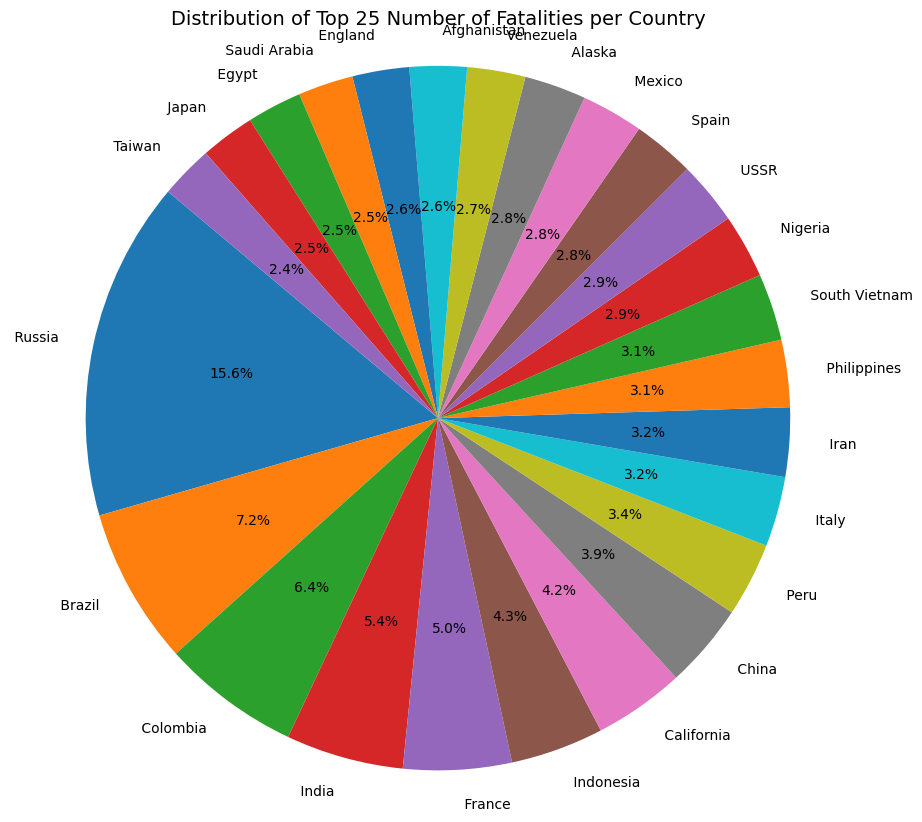

In [35]:
country_fatalities = (
    fatality_locations.groupby('State/Country')['Fatalities']
    .sum()
    .sort_values(ascending=False)
)
top_25 = country_fatalities.head(25)

plt.figure(figsize=(10, 10))
plt.pie(top_25, labels=top_25.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 25 Number of Fatalities per Country', fontsize=14)
plt.axis('equal')
plt.show()
